In [1]:
import numpy as np
import matplotlib.pyplot as plt

Constants: (natural units)

In [2]:
H0    = 1.5123e-33
T0    = 0.24e-3
G     = 1
GF    = 1.1664e-23
kB    = 1
Mpl   = 1.2211e28
rho_c = (3*(H0**2))/(8*np.pi*G)

Freeze out temperatures CDM and HDM for intastaneous freeze-out:

In [3]:
def T_fo_HDM(masses, scale):
    return pow(((scale*GF)**2)*Mpl, (-1/3))

def T_fo_HDM_equipart(masses, scale):
    return pow(3*kB*((scale*GF)**4)*(Mpl**2)/masses, (-1/7))

def T_fo_CDM(masses, scale):
    return masses / np.log(Mpl*((scale*GF)**2)*(masses**3)*pow(3*kB,(1/2)))

In [4]:
def numdens_fo_HDM(masses, T_fo):
    return pow(T_fo, 3)

def numdens_fo_CDM(masses, T_fo):
    return pow(masses*T_fo, (3/2))*np.exp(-masses/T_fo)

Relic abundance today:

In [31]:
m_min = 100e8
m_max = 100e10
n_points = 100
masses = np.logspace(np.log10(m_min), np.log10(m_max), num=n_points) # mass of the DM particle

scale_min = 0.4
scale_max = 1.6
n_curves = 5
scales = np.linspace(scale_min, scale_max, num=n_curves) # rescaling of the cross-section


# T_fo_hot = [T_fo_HDM_equipart(masses, scale) for scale in scales]
T_fo_hot = [T_fo_HDM(masses, scale) for scale in scales]
n_fo_hot = [numdens_fo_HDM(masses, T_fo) for T_fo in T_fo_hot]

T_fo_cold = [T_fo_CDM(masses, scale) for scale in scales]
n_fo_cold = [numdens_fo_CDM(masses, T_fo) for T_fo in T_fo_cold]

CDM_input = list(zip(T_fo_cold, n_fo_cold))
HDM_input = list(zip(T_fo_hot, n_fo_hot))


### Cross-sections

cs_hot = [pow(T_hot,2)/(Mpl * n_hot) for (T_hot, n_hot) in HDM_input]
cs_cold = [pow(T_cold,2)/(Mpl * n_cold) for (T_cold, n_cold) in CDM_input]


OM_HDM = [(masses*(T0**3)*n_hot/(rho_c*(T_hot**3))) for (T_hot, n_hot) in HDM_input]
OM_CDM = [(masses*(T0**3)*n_cold/(rho_c*(T_cold**3))) for (T_cold, n_cold) in CDM_input]

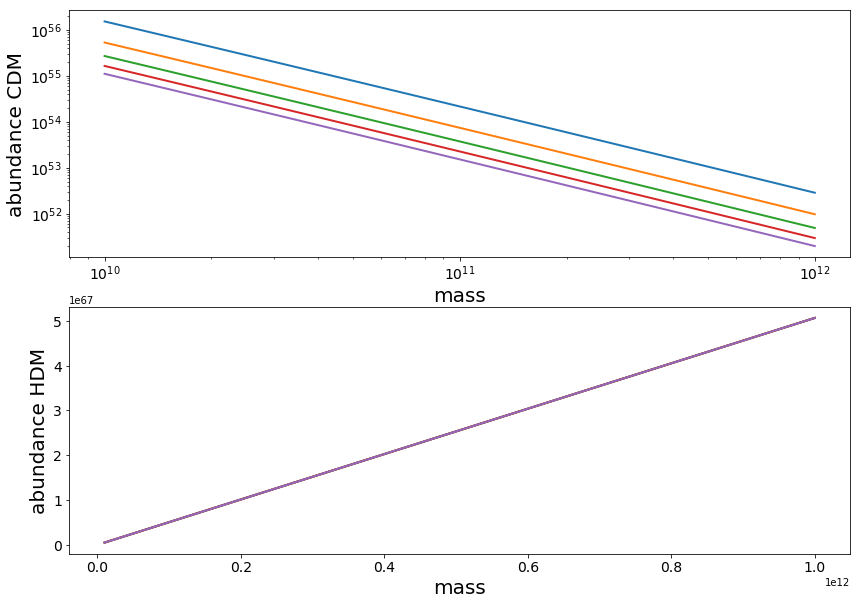

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10))

for OM_cold in OM_CDM:
    ax1.plot(masses, OM_cold, lw=2)
    
for OM_hot in OM_HDM:
    ax2.plot(masses, OM_hot, lw=2)

for ax in (ax1,ax2):
    ax.tick_params(labelsize=16)

ax1.set_xlabel("mass", fontsize=20)
ax1.set_ylabel("abundance CDM", fontsize=20)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xlabel("mass", fontsize=20)
ax2.set_ylabel("abundance HDM", fontsize=20)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
# ax2.set_xscale('linear')
# ax2.set_yscale('linear')
plt.show()